The Kaggle Dataset and a simple project related to that project can be found here: https://www.kaggle.com/code/gkitchen/s-p500-spy-prediction

The code below is what we did:

In [1]:
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM

# Load dataset
data = pd.read_csv('spy.csv')


In [2]:
# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Volume']])

# Feature Selection
features = data[['Open', 'High', 'Low', 'Volume']]
target = data['Close']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


SimpleRNN

In [4]:
# RMSE Calculation Function
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))
# Reshape data for RNN
X_train_rnn = np.reshape(X_train.to_numpy(), (X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = np.reshape(X_test.to_numpy(), (X_test.shape[0], 1, X_test.shape[1]))

# Building the SimpleRNN model
simple_rnn_model = Sequential()
simple_rnn_model.add(SimpleRNN(units=50, input_shape=(1, X_train.shape[1])))
simple_rnn_model.add(Dense(1))

# Compile and train the SimpleRNN model
simple_rnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[rmse])
simple_rnn_history = simple_rnn_model.fit(X_train_rnn, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Predictions
simple_rnn_predictions = simple_rnn_model.predict(X_test_rnn)

# Extracting Metrics for SimpleRNN
simple_rnn_training_rmse = min(simple_rnn_history.history['rmse'])
simple_rnn_testing_rmse = min(simple_rnn_history.history['val_rmse'])
print(f"SimpleRNN - Training RMSE: {simple_rnn_training_rmse}, Testing RMSE: {simple_rnn_testing_rmse}")


Epoch 1/100
154/154 [==============================] - 2s 5ms/step - loss: 0.0093 - rmse: 0.0616 - val_loss: 9.2888e-05 - val_rmse: 0.0096
Epoch 2/100
154/154 [==============================] - 0s 3ms/step - loss: 8.8567e-05 - rmse: 0.0093 - val_loss: 8.0092e-05 - val_rmse: 0.0089
Epoch 3/100
154/154 [==============================] - 1s 5ms/step - loss: 8.2974e-05 - rmse: 0.0090 - val_loss: 6.9424e-05 - val_rmse: 0.0083
Epoch 4/100
154/154 [==============================] - 1s 5ms/step - loss: 7.7992e-05 - rmse: 0.0087 - val_loss: 6.3391e-05 - val_rmse: 0.0079
Epoch 5/100
154/154 [==============================] - 0s 3ms/step - loss: 7.3589e-05 - rmse: 0.0085 - val_loss: 5.9330e-05 - val_rmse: 0.0076
Epoch 6/100
154/154 [==============================] - 0s 3ms/step - loss: 6.9011e-05 - rmse: 0.0082 - val_loss: 5.6537e-05 - val_rmse: 0.0075
Epoch 7/100
154/154 [==============================] - 0s 3ms/step - loss: 6.2245e-05 - rmse: 0.0077 - val_loss: 5.3252e-05 - val_rmse: 0.0073
Epo

In [5]:
# Building the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, input_shape=(1, X_train.shape[1])))
lstm_model.add(Dense(1))

# Compile and train the LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[rmse])
lstm_history = lstm_model.fit(X_train_rnn, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Predictions
lstm_predictions = lstm_model.predict(X_test_rnn)

# Extracting Metrics for LSTM
lstm_training_rmse = min(lstm_history.history['rmse'])
lstm_testing_rmse = min(lstm_history.history['val_rmse'])
print(f"LSTM - Training RMSE: {lstm_training_rmse}, Testing RMSE: {lstm_testing_rmse}")


Epoch 1/100
154/154 [==============================] - 3s 7ms/step - loss: 0.0233 - rmse: 0.1254 - val_loss: 8.1119e-04 - val_rmse: 0.0284
Epoch 2/100
154/154 [==============================] - 1s 4ms/step - loss: 2.1004e-04 - rmse: 0.0137 - val_loss: 1.0022e-04 - val_rmse: 0.0100
Epoch 3/100
154/154 [==============================] - 1s 4ms/step - loss: 1.0538e-04 - rmse: 0.0102 - val_loss: 7.9973e-05 - val_rmse: 0.0089
Epoch 4/100
154/154 [==============================] - 1s 4ms/step - loss: 8.1995e-05 - rmse: 0.0090 - val_loss: 5.9791e-05 - val_rmse: 0.0077
Epoch 5/100
154/154 [==============================] - 1s 5ms/step - loss: 5.9588e-05 - rmse: 0.0076 - val_loss: 4.1238e-05 - val_rmse: 0.0064
Epoch 6/100
154/154 [==============================] - 1s 6ms/step - loss: 4.0309e-05 - rmse: 0.0062 - val_loss: 2.6904e-05 - val_rmse: 0.0051
Epoch 7/100
154/154 [==============================] - 1s 5ms/step - loss: 2.5875e-05 - rmse: 0.0050 - val_loss: 1.6978e-05 - val_rmse: 0.0040
Epo

In [6]:
# Building the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, input_shape=(1, X_train.shape[1])))
lstm_model.add(Dense(1))

# Compile and train the LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[rmse])
lstm_history = lstm_model.fit(X_train_rnn, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Predictions
lstm_predictions = lstm_model.predict(X_test_rnn)

# Extracting Metrics for LSTM
lstm_training_rmse = min(lstm_history.history['rmse'])
lstm_testing_rmse = min(lstm_history.history['val_rmse'])
print(f"LSTM - Training RMSE: {lstm_training_rmse}, Testing RMSE: {lstm_testing_rmse}")


Epoch 1/100
154/154 [==============================] - 5s 9ms/step - loss: 0.0244 - rmse: 0.1296 - val_loss: 0.0011 - val_rmse: 0.0335
Epoch 2/100
154/154 [==============================] - 1s 4ms/step - loss: 2.9889e-04 - rmse: 0.0162 - val_loss: 1.3217e-04 - val_rmse: 0.0115
Epoch 3/100
154/154 [==============================] - 1s 4ms/step - loss: 1.3522e-04 - rmse: 0.0115 - val_loss: 1.0319e-04 - val_rmse: 0.0101
Epoch 4/100
154/154 [==============================] - 1s 4ms/step - loss: 1.0731e-04 - rmse: 0.0103 - val_loss: 8.1181e-05 - val_rmse: 0.0090
Epoch 5/100
154/154 [==============================] - 1s 5ms/step - loss: 8.1786e-05 - rmse: 0.0089 - val_loss: 6.2384e-05 - val_rmse: 0.0079
Epoch 6/100
154/154 [==============================] - 1s 5ms/step - loss: 5.8811e-05 - rmse: 0.0076 - val_loss: 4.2176e-05 - val_rmse: 0.0064
Epoch 7/100
154/154 [==============================] - 1s 4ms/step - loss: 4.0728e-05 - rmse: 0.0063 - val_loss: 2.9698e-05 - val_rmse: 0.0054
Epoch 8

In [7]:
# Calculating MSE and R2 for SimpleRNN and LSTM
simple_rnn_mse = mean_squared_error(y_test, simple_rnn_predictions.flatten())
simple_rnn_r2 = r2_score(y_test, simple_rnn_predictions.flatten())

lstm_mse = mean_squared_error(y_test, lstm_predictions.flatten())
lstm_r2 = r2_score(y_test, lstm_predictions.flatten())

print(f"SimpleRNN - MSE: {simple_rnn_mse}, R2: {simple_rnn_r2}")
print(f"LSTM - MSE: {lstm_mse}, R2: {lstm_r2}")


SimpleRNN - MSE: 4.642190699273411e-06, R2: 0.9999183001338766
LSTM - MSE: 8.767263225158224e-06, R2: 0.999845701247931


Visualisation

In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import numpy as np

# Load the data
data = pd.read_csv('spy.csv')

# Selecting the 'Close' column and scaling
close_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Create a dataset where the features are lagged values of the closing prices
X = []
y = []
lag = 60  # Number of days to use for prediction

for i in range(lag, len(scaled_data)):
    X.append(scaled_data[i-lag:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [11]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10
239/239 [==============================] - 18s 60ms/step - loss: 0.0033
Epoch 2/10
239/239 [==============================] - 14s 59ms/step - loss: 1.0711e-04
Epoch 3/10
239/239 [==============================] - 14s 59ms/step - loss: 1.1551e-04
Epoch 4/10
239/239 [==============================] - 14s 59ms/step - loss: 1.0437e-04
Epoch 5/10
239/239 [==============================] - 14s 59ms/step - loss: 1.2391e-04
Epoch 6/10
239/239 [==============================] - 14s 59ms/step - loss: 9.9565e-05
Epoch 7/10
239/239 [==============================] - 14s 59ms/step - loss: 9.1306e-05
Epoch 8/10
239/239 [==============================] - 14s 59ms/step - loss: 8.3418e-05
Epoch 9/10
239/239 [==============================] - 14s 60ms/step - loss: 7.2264e-05
Epoch 10/10
239/239 [==============================] - 14s 59ms/step - loss: 7.7568e-05


239/239 [==============================] - 4s 17ms/step


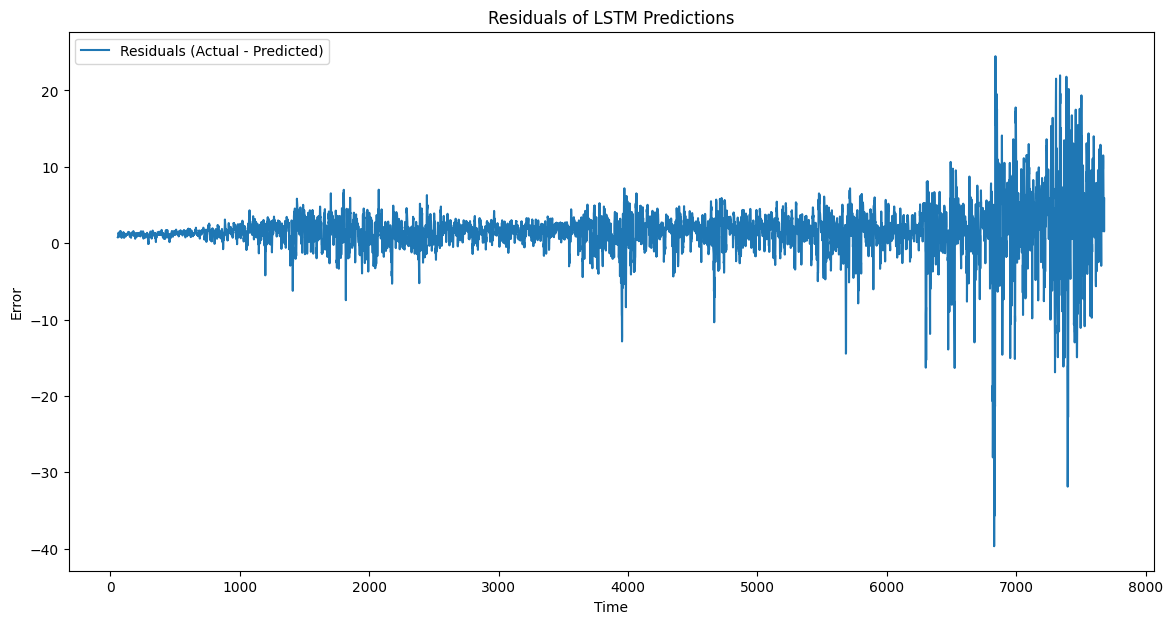

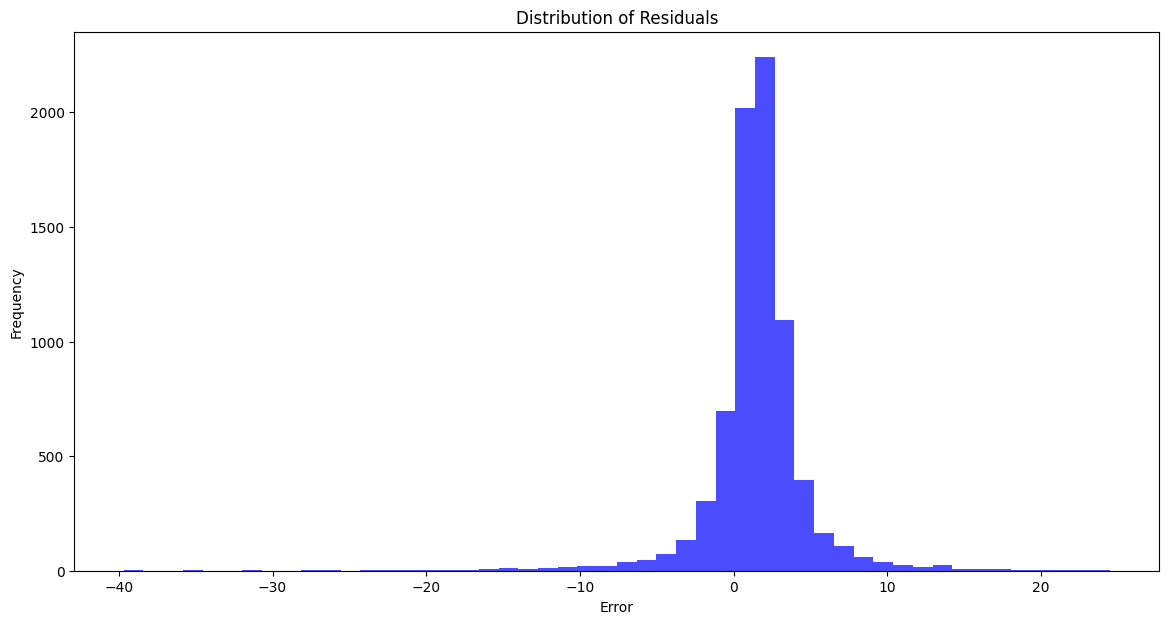

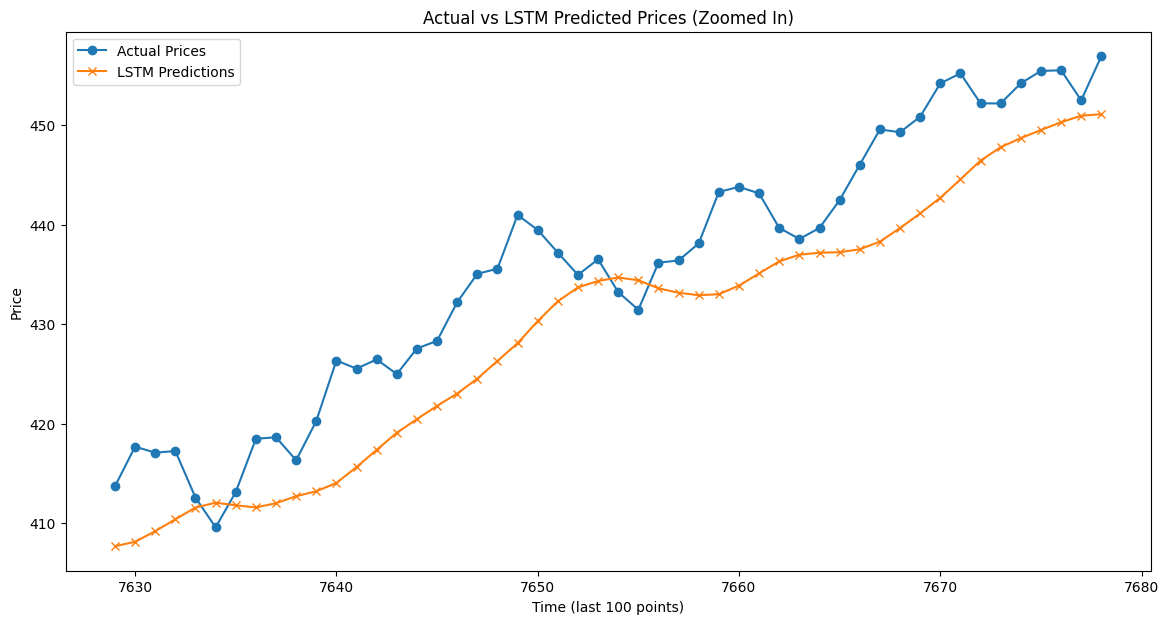

239/239 [==============================] - 5s 21ms/step


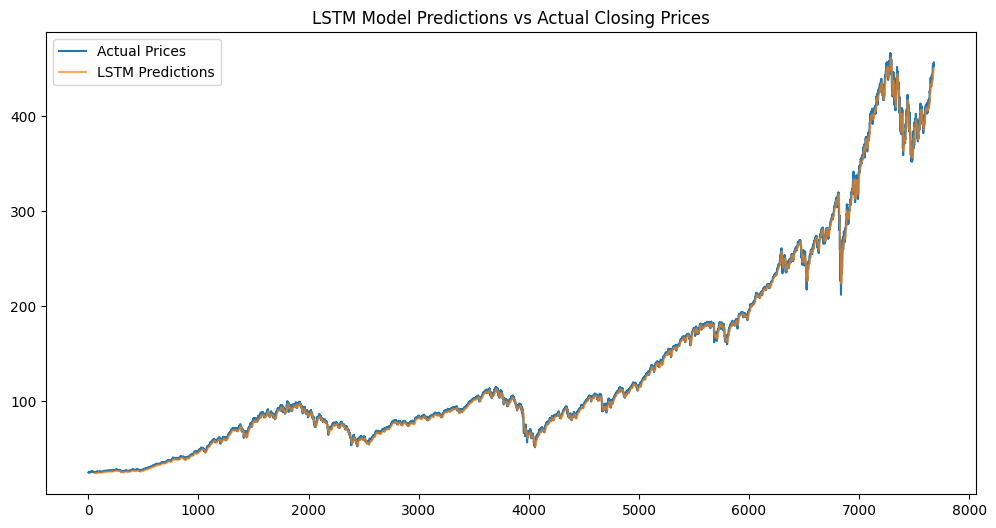

In [15]:
import matplotlib.pyplot as plt

# Making predictions
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Preparing data for plotting by adding the 'Predictions' column
data['Predictions'] = np.nan
data.loc[lag:, 'Predictions'] = predicted_prices.flatten()

# Calculate residuals (errors)
residuals = data['Close'] - data['Predictions']

# Plot residuals
plt.figure(figsize=(14, 7))
plt.plot(residuals, label='Residuals (Actual - Predicted)')
plt.title('Residuals of LSTM Predictions')
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend()
plt.show()

# Error distribution
plt.figure(figsize=(14, 7))
plt.hist(residuals.dropna(), bins=50, alpha=0.7, color='blue')  # dropna() to ignore missing values
plt.title('Distribution of Residuals')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

#predicting last 50
zoomed_section = data[-50:]
plt.figure(figsize=(14, 7))
plt.plot(zoomed_section['Close'], label='Actual Prices', marker='o')
plt.plot(zoomed_section['Predictions'], label='LSTM Predictions', marker='x')
plt.title('Actual vs LSTM Predicted Prices (Zoomed In)')
plt.xlabel('Time (last 100 points)')
plt.ylabel('Price')
plt.legend()
plt.show()


# Making predictions
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)
import matplotlib.pyplot as plt

# Preparing data for plotting
data['Predictions'] = np.nan
data.loc[lag:, 'Predictions'] = predicted_prices.flatten()

# Plotting
plt.figure(figsize=(12, 6))
plt.title('LSTM Model Predictions vs Actual Closing Prices')
plt.plot(data['Close'], label='Actual Prices')
plt.plot(data['Predictions'], label='LSTM Predictions', alpha=0.7)
plt.legend()
plt.show()
